# Canadian Immegration  dataset Analysis



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset& Display basic information about the dataset

In [2]:

df = pd.read_csv("canadian_immegration_data.csv")

print(df.info())
print(df.head())
print(df.describe())
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


# Data Cleaning (Check for missing values & duplicated)

In [4]:

print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())
print("\nduplicate Values Before Cleaning:")
print(df.duplicated().sum())


Missing Values Before Cleaning:
Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

duplicate Values Before Cleaning:
0


Total immigration analysis (1980-2013)

> Add blockquote



In [45]:
total_years = [str(year) for year in range(1980, 2014)]
total_immigration = df['Total'].sum()
print("\nTotal immigrnt across all years:")
print(total_immigration)
total_immigratnts =df[total_years].sum()
print("\nTotal immigrnt per years:")
print(total_immigratnts)


Total immigrnt across all years:
6409153

Total immigrnt per years:
1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64


Total immigrants per continent across all years sorted in ascending order

In [33]:
print ("\nTotal immigrants per continent across all years:")
continent_total = df.groupby("Continent")[total_years].sum().sum(axis=1).reset_index()
continent_total.columns = ["Continent", "Total"]
continent_total = continent_total.sort_values(by="Total", ascending=False)
print (continent_total)


Total immigrants per continent across all years:
                         Continent    Total
1                             Asia  3317794
2                           Europe  1410947
3  Latin America and the Caribbean   765148
0                           Africa   618948
4                 Northern America   241142
5                          Oceania    55174


Regions Analysis

In [7]:
Region_total = df.groupby("Region")[total_years].sum().sum(axis=1).reset_index()
Region_total.columns = ["Region", "Total"]
Region_total = Region_total.sort_values(by="Total", ascending=False)
print("\n By Region_total:")
print(Region_total)


 By Region_total:
                       Region    Total
17              Southern Asia  1398120
5                Eastern Asia   841201
15         South-Eastern Asia   687329
12            Northern Europe   589584
6              Eastern Europe   421223
20               Western Asia   376120
1                   Caribbean   308253
14              South America   295242
10            Northern Africa   255451
11           Northern America   241142
21             Western Europe   231596
18            Southern Europe   168544
4              Eastern Africa   167389
2             Central America   161653
19             Western Africa   105901
9               Middle Africa    48628
16            Southern Africa    41579
0   Australia and New Zealand    34215
7                   Melanesia    20689
3                Central Asia    15024
13                  Polynesia      234
8                  Micronesia       36


North Africa Region Analysis

In [6]:
north_africa_countries = ["Algeria", "Egypt", "Libya", "Morocco", "Tunisia","Sudan"]
north_africa_immigrants = df[df['Country'].isin(north_africa_countries)][['Country'] + total_years]
north_africa_immigrants["Total"] = north_africa_immigrants[total_years].sum(axis=1)
north_africa_immigrants = north_africa_immigrants.sort_values(by="Total", ascending=False)
print("Total immigrants from North African countries:")
print(north_africa_immigrants[['Country', 'Total']].to_string(index=False))

Total immigrants from North African countries:
Country  Total
  Egypt  72745
Morocco  72267
Algeria  69439
  Sudan  18506
Tunisia  17583
  Libya   4909


 Top 10 countries with the highest total immigration

In [7]:
print ("\nTop 10 countries with the highest total immigration:")
top_countries = df[['Country', 'Total']].sort_values(by='Total', ascending=False).head(10)
print (top_countries)


Top 10 countries with the highest total immigration:
                                               Country   Total
79                                               India  691904
36                                               China  659962
183  United Kingdom of Great Britain and Northern I...  551500
136                                        Philippines  511391
130                                           Pakistan  241600
185                           United States of America  241122
81                          Iran (Islamic Republic of)  175923
162                                          Sri Lanka  148358
140                                  Republic of Korea  142581
137                                             Poland  139241


Total Immigration to Canada for every year from  (1980-2013)

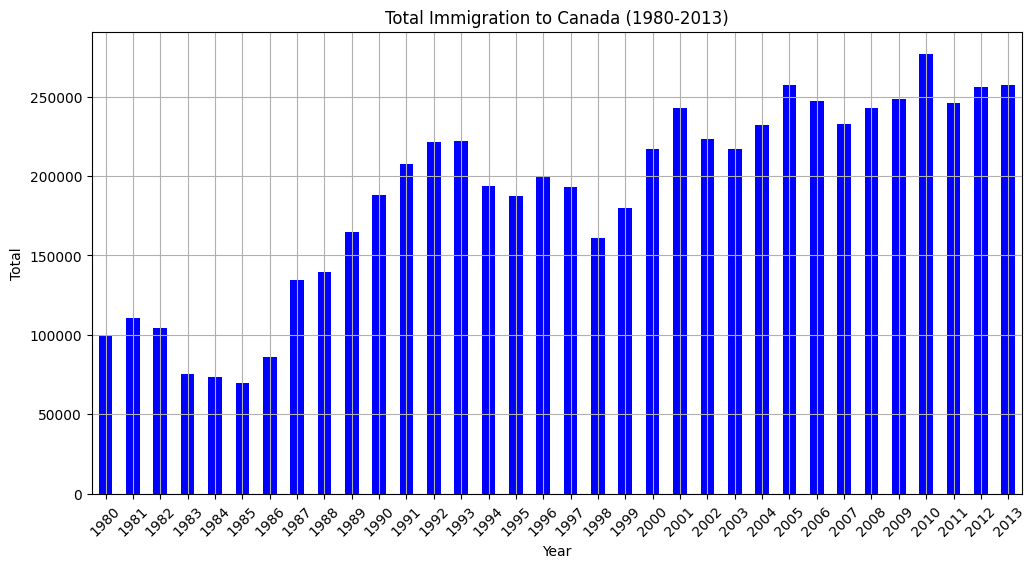

In [9]:
total_immigration = df[total_years].sum()
plt.figure(figsize=(12, 6))
total_immigration.plot(kind='bar', color='blue')
plt.xlabel("Year")
plt.ylabel("Total")
plt.title("Total Immigration to Canada (1980-2013)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Total of Immigration by Continent

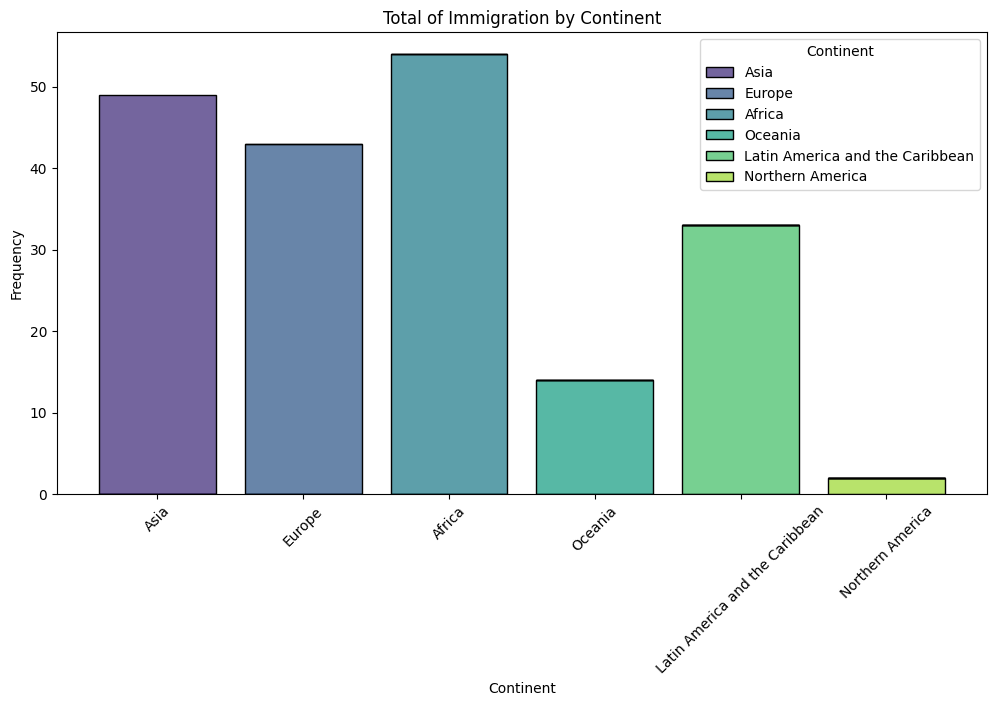

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Continent", hue="Continent", multiple="stack", shrink=0.8, palette="viridis")
plt.xlabel("Continent")
plt.ylabel("Frequency")
plt.title("Total of Immigration by Continent")
plt.xticks(rotation=45)
plt.show()

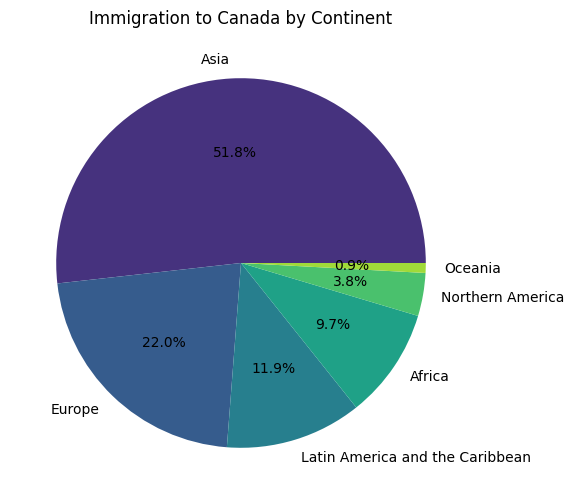

In [11]:
plt.figure(figsize=(10, 6))
plt.pie(continent_total["Total"], labels=continent_total["Continent"], autopct='%1.1f%%', colors=sns.color_palette("viridis", len(continent_total)))
plt.title("Immigration to Canada by Continent")
plt.show()

<ipython-input-12-259e63d2139c>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="Region",  multiple="stack", shrink=0.6, palette="viridis")


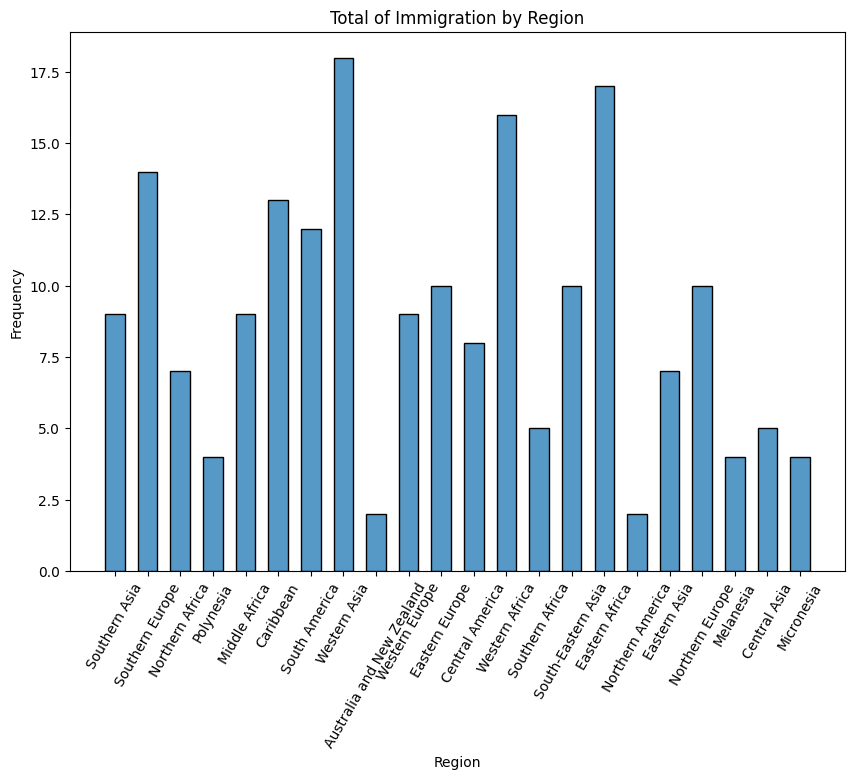

In [12]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x="Region",  multiple="stack", shrink=0.6, palette="viridis")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Total of Immigration by Region")
plt.xticks(rotation=60)
plt.show()

<ipython-input-13-be444065ae0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Country', data=top_countries, palette='viridis')


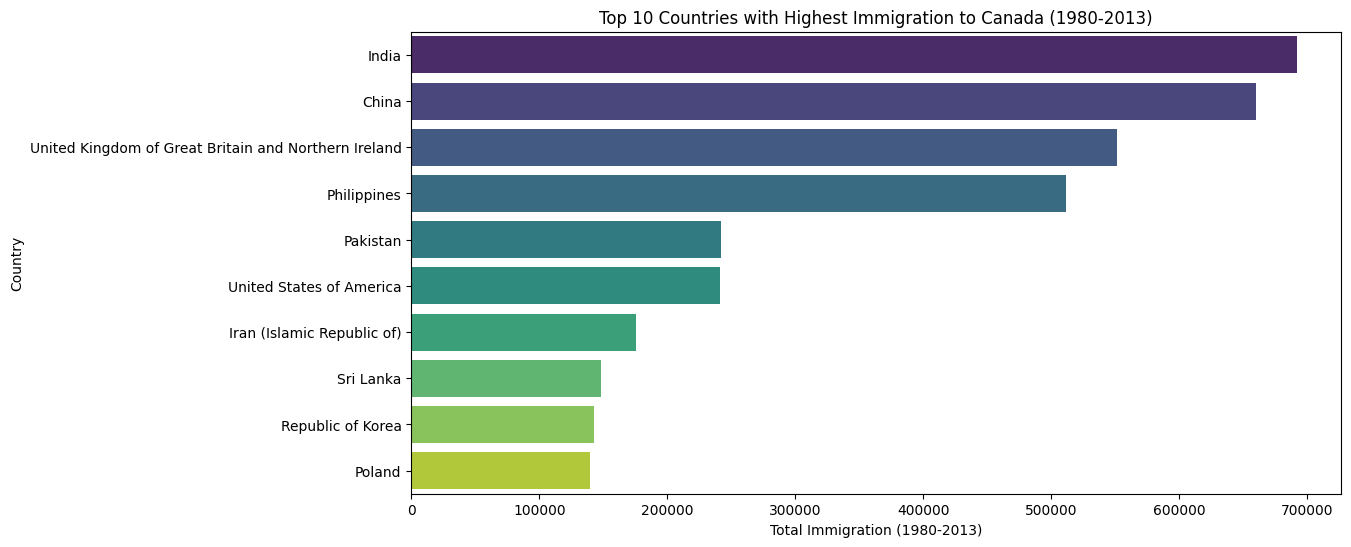

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Country', data=top_countries, palette='viridis')
plt.xlabel("Total Immigration (1980-2013)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Immigration to Canada (1980-2013)")
plt.show()

<ipython-input-14-44cbff41a942>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Country', data=north_africa_immigrants, palette='viridis')


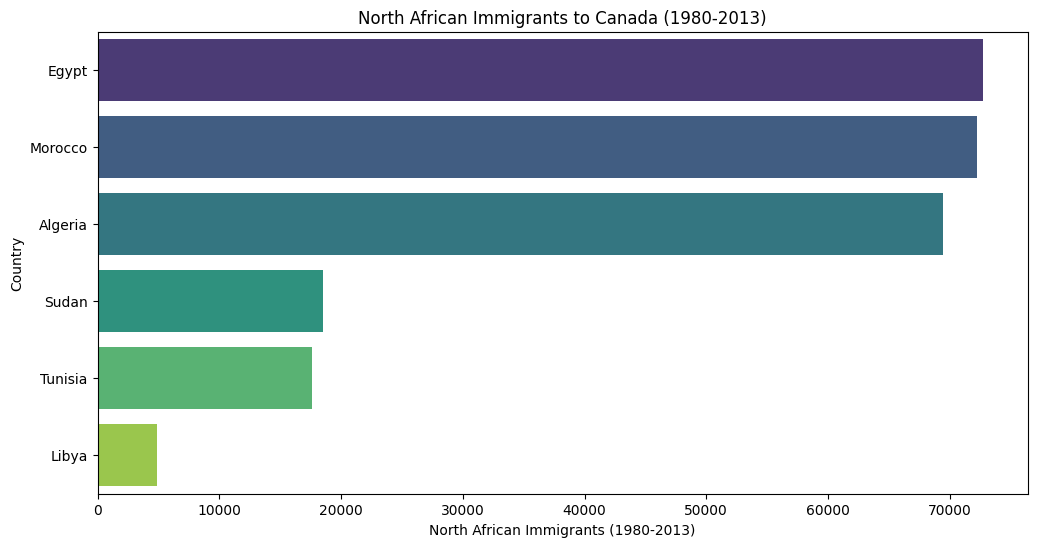

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Country', data=north_africa_immigrants, palette='viridis')
plt.xlabel("North African Immigrants (1980-2013)")
plt.ylabel("Country")
plt.title("North African Immigrants to Canada (1980-2013)")
plt.show()

<Figure size 1200x600 with 0 Axes>

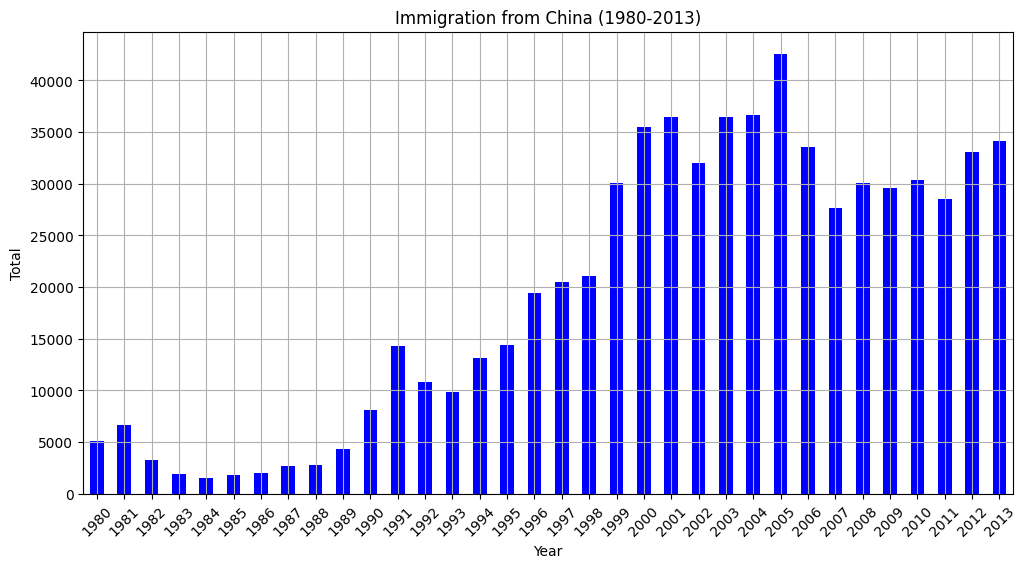

In [22]:
china_data = df[df['Country'] == 'China'][total_years].T
plt.figure(figsize=(12, 6))
china_data.plot(kind='bar', legend=False, color='blue', figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Total")
plt.title("Immigration from China (1980-2013)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

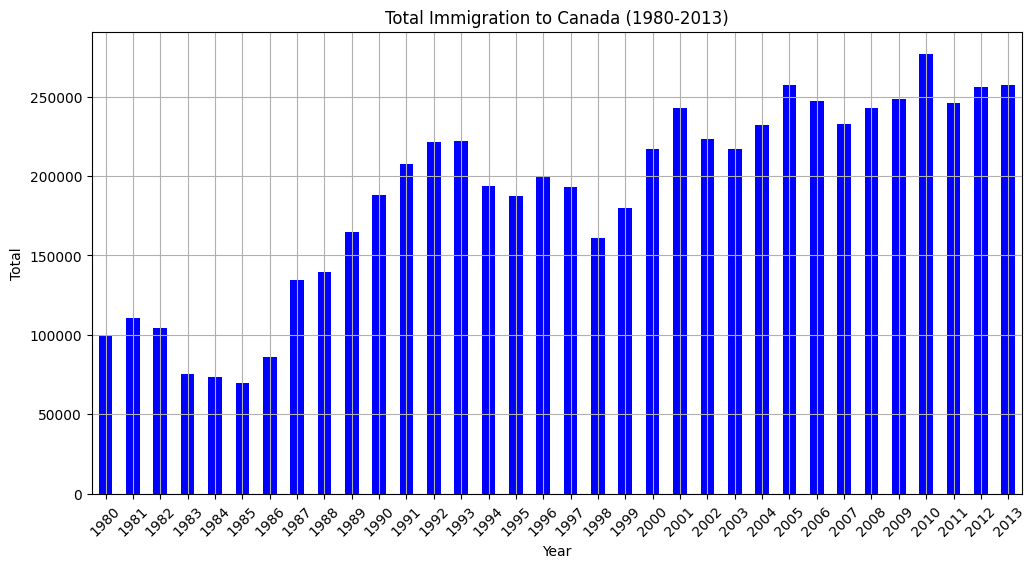

In [17]:
total_immigration = df[total_years].sum()
plt.figure(figsize=(12, 6))
total_immigration.plot(kind='bar', color='blue')
plt.xlabel("Year")
plt.ylabel("Total")
plt.title("Total Immigration to Canada (1980-2013)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Top 5 Years with Highest Total Immigration:
2010    276956
2013    257537
2005    257457
2012    256222
2009    248768
dtype: int64


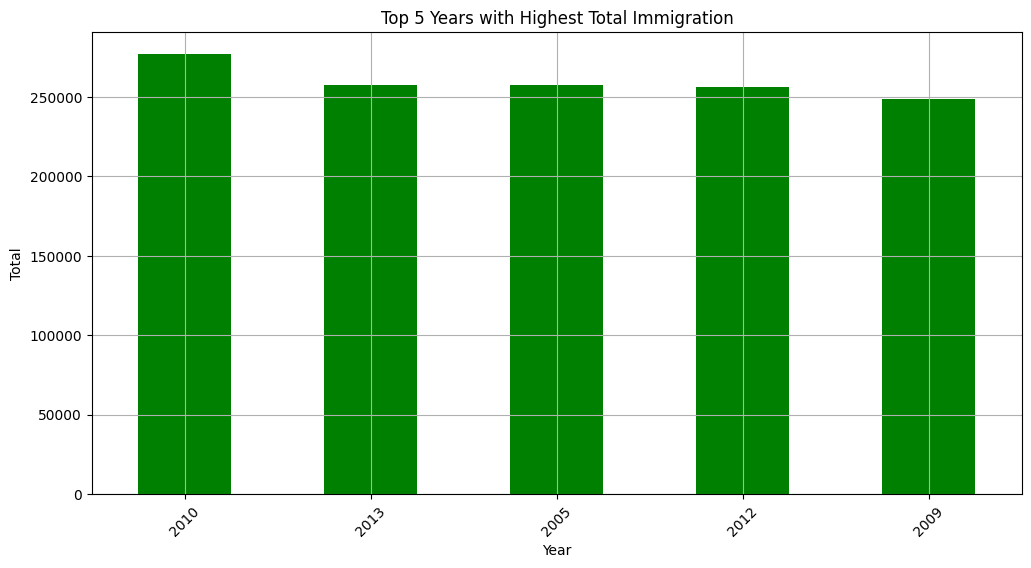

In [9]:
highest_years = total_immigration.sort_values(ascending=False).head(5)
print("Top 5 Years with Highest Total Immigration:")
print(highest_years)

plt.figure(figsize=(12, 6))
highest_years.plot(kind='bar', color='green')
plt.xlabel("Year")
plt.ylabel("Total")
plt.title("Top 5 Years with Highest Total Immigration")
plt.xticks(rotation=45)
plt.grid()
plt.show()

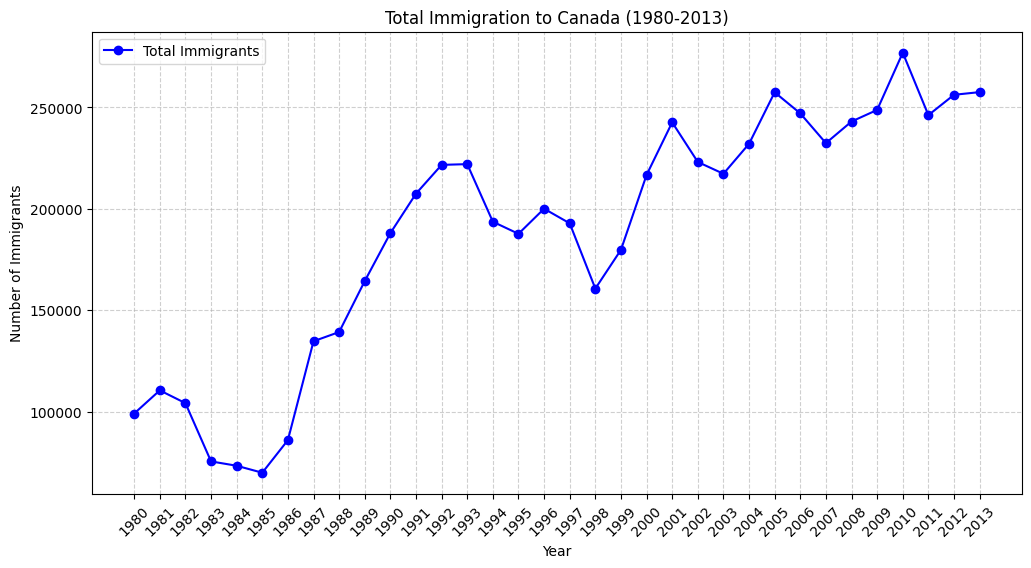

In [25]:
years = list(map(str, range(1980, 2014)))  # Years as strings
total_immigrants_per_year = df[years].sum()  # Summing immigration numbers for each year

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(years, total_immigrants_per_year, marker='o', linestyle='-', color='b', label='Total Immigrants')
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Total Immigration to Canada (1980-2013)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()